In [1]:
import matplotlib.pyplot as plt
import numpy

[[1.   0.75 0.5 ]
 [0.4  0.3  0.9 ]
 [0.1  0.8  0.2 ]]


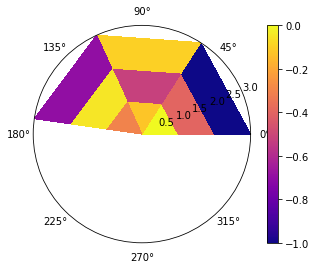

In [70]:
σ = np.array([
    [1, 0.75, 0.5],
    [0.4, 0.3, 0.9],
    [0.1, 0.8, 0.2]
])
print(σ)
plt.subplot(111, projection='polar')
plt.pcolormesh(np.log10(σ), cmap='plasma')
plt.colorbar()

[[1.34558136e-03 1.34419867e-03 1.34090483e-03 ... 1.34265801e-03
  1.34501965e-03 1.34574611e-03]
 [1.28488705e-03 1.29393804e-03 1.30241879e-03 ... 1.25518805e-03
  1.26543765e-03 1.27535341e-03]
 [6.77295678e-04 6.77198619e-04 6.80170578e-04 ... 7.00261377e-04
  6.88532749e-04 6.80855122e-04]
 ...
 [1.15287940e-04 1.15272657e-04 1.15253805e-04 ... 1.15312896e-04
  1.15308278e-04 1.15299781e-04]
 [1.07815561e-04 1.07761199e-04 1.07704573e-04 ... 1.07965072e-04
  1.07917492e-04 1.07867658e-04]
 [9.83466902e-05 9.82392747e-05 9.81331419e-05 ... 9.86763898e-05
  9.85652742e-05 9.84553653e-05]]


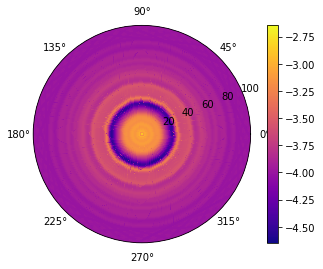

In [72]:
# define file paths for 2d and 1d data, then load them in
iteration_step = 2
file_path_2d = f'{SIMULATION_DIR}out/gasdens{iteration_step}.dat'
σ = np.fromfile(f'{file_path_2d}').reshape(RES_r, RES_φ)
print(σ)

plt.subplot(111, projection='polar')
plt.pcolormesh(np.log10(σ), cmap='plasma')
plt.colorbar()

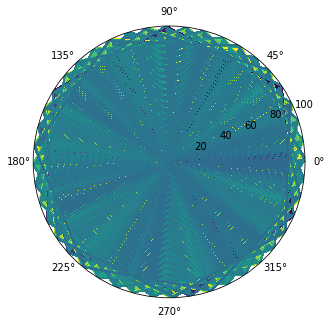

In [97]:
σ2 = [i[500] for i in σ]

plt.figure(figsize=(5, 5))
plt.subplot(projection='polar')
plt.pcolormesh(np.log10([[i[1] for i in σ] for i in range(100)]))

In [33]:
print(σ)

[[1.   0.75 0.5 ]
 [0.4  0.3  0.9 ]
 [0.1  0.8  0.2 ]]


plotting data for file 1


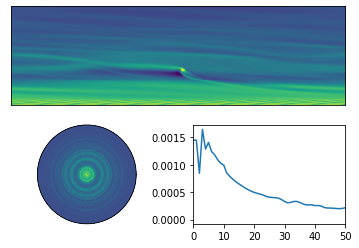

In [40]:

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import sys


# setup
SIMULATION_ID = 'testing_cells_per_rH/2.5c_per_rH_e.2'  # sys.argv[1]

RES_r, RES_φ = 101, 634
r = np.linspace(0, RES_r - 1, RES_r)
φ = np.linspace(0, RES_φ - 1, RES_φ)

FIGURES_DIR = f'../figures/{SIMULATION_ID}/'
#if SIMULATION_ID not in os.listdir('../figures/'):
#    os.mkdir(FIGURES_DIR)

SIMULATION_DIR = f'../fargo2d1d/{SIMULATION_ID}/'

fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)

# loop over all files in simulation output directory
for iteration_step in range(1, 2):

    # define file paths for 2d and 1d data, then load them in
    file_path_2d = f'{SIMULATION_DIR}out/gasdens{iteration_step}.dat'
    file_path_1d = f'{SIMULATION_DIR}out/gasdens1D{iteration_step}.dat'
    try:
        σ = np.log10(np.fromfile(f'{file_path_2d}').reshape(RES_r, RES_φ))
        λ = np.fromfile(f'{file_path_1d}')
    except FileNotFoundError:
        continue

    print(f'plotting data for file {iteration_step}')
    # rearange 2d array so that planet sits in the center of plot
    for row_idx, row in enumerate(σ):
        first_half = list(row)[:int(RES_φ / 2)]
        second_half = list(row)[int(RES_φ / 2):]
        σ[row_idx] = np.array(second_half + first_half)

    # plot 2d data in rectangular grid
    ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=2))
    plt.title('')
    plt.imshow(σ, origin='lower', aspect='auto')
    plt.xticks([])
    plt.yticks([])
    # plt.colorbar()

    # plot 2d data in polar coords
    ax2 = plt.subplot(gs.new_subplotspec((1, 0), colspan=1), projection='polar')
    plt.pcolormesh(σ)
    plt.xticks([])
    plt.yticks([])

    # plot 1d data
    ax2 = plt.subplot(gs.new_subplotspec((1, 1), colspan=1))
    plt.plot(λ)
    plt.xlim(0, 50)
    #plt.xticks([])
    #plt.yticks([])

    # save and reset figure
    #plt.savefig(f'{FIGURES_DIR}plot{iteration_step}.png')
    #plt.clf()

# create gif of all images that where created
#images = ' '.join([f'{FIGURES_DIR}/{i}' for i in sorted(os.listdir(FIGURES_DIR))])
#os.system(f'convert {images} {FIGURES_DIR}evolution.gif')
# os.system(f'convert {FIGURES_DIR}*.png {FIGURES_DIR}evolution.gif')


In [29]:
print(σ)

[[-3.00953648 -3.00536758 -3.00163541 ... -3.02585554 -3.01967457
  -3.0142636 ]
 [-3.10751654 -3.09123185 -3.07560141 ... -3.15691023 -3.14068738
  -3.12410082]
 [-2.97691841 -2.99439084 -3.01081685 ... -2.93518503 -2.94611715
  -2.96024754]
 ...
 [-3.95634056 -3.95582745 -3.95532314 ... -3.95793138 -3.95739269
  -3.95686237]
 [-3.95821683 -3.9580168  -3.95782414 ... -3.95886133 -3.95863915
  -3.95842429]
 [-3.96075715 -3.96075412 -3.96075163 ... -3.96076907 -3.96076471
  -3.9607607 ]]
